## Покращення ефективності та часу виконання задачі "Прибульці та IQ"

Перша функція: читання з файлу та запис елементів у словник

![Screenshot 2024-04-18 at 20.13.49.png](<attachment:Screenshot 2024-04-18 at 20.13.49.png>)
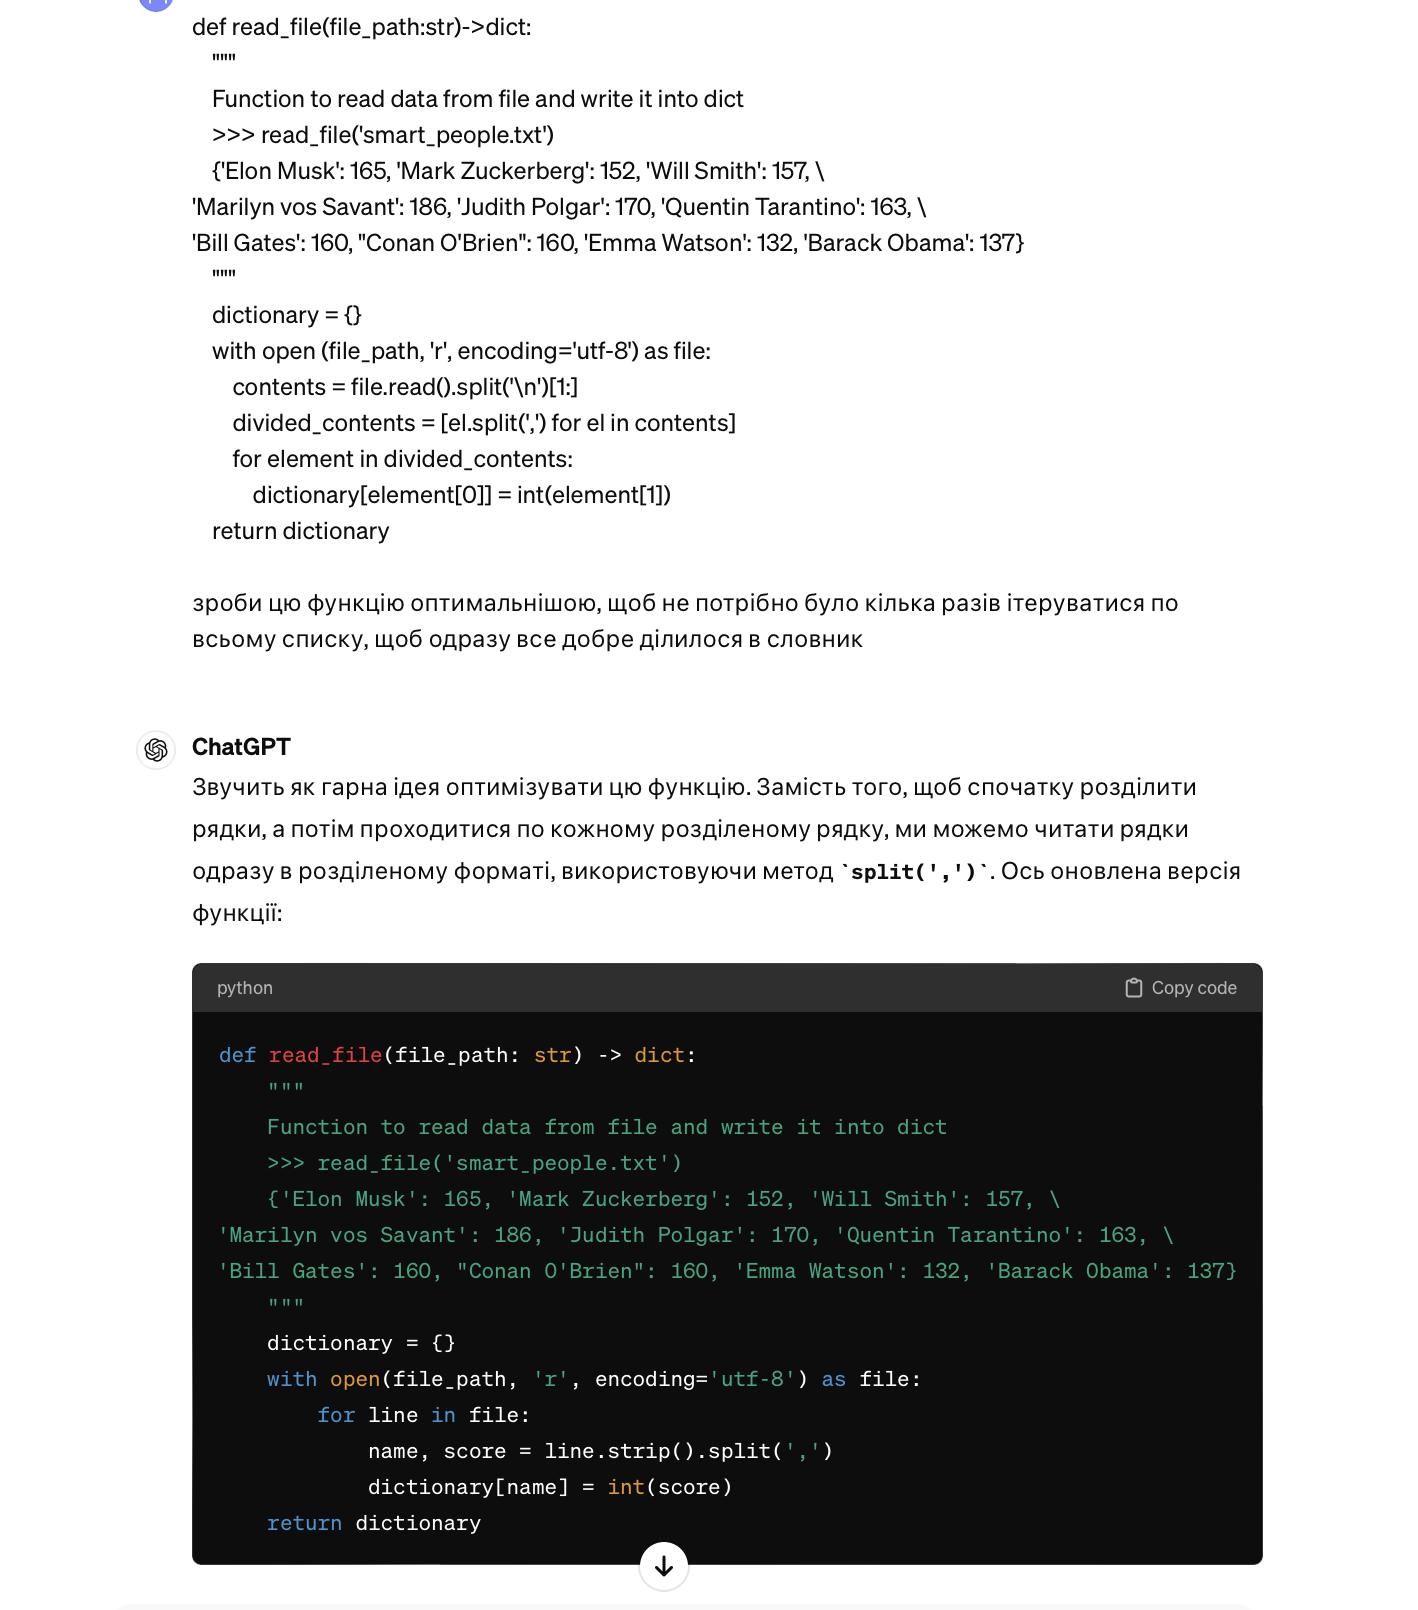

In [ ]:
def read_file(file_path: str) -> dict:
    """
    Function to read data from file and write it into dict
    >>> read_file('smart_people.txt')
    {'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Will Smith': 157, \
'Marilyn vos Savant': 186, 'Judith Polgar': 170, 'Quentin Tarantino': 163, \
'Bill Gates': 160, "Conan O'Brien": 160, 'Emma Watson': 132, 'Barack Obama': 137}
    """
    dictionary = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            name, score = line.strip().split(',')
            dictionary[name] = int(score)
    return dictionary

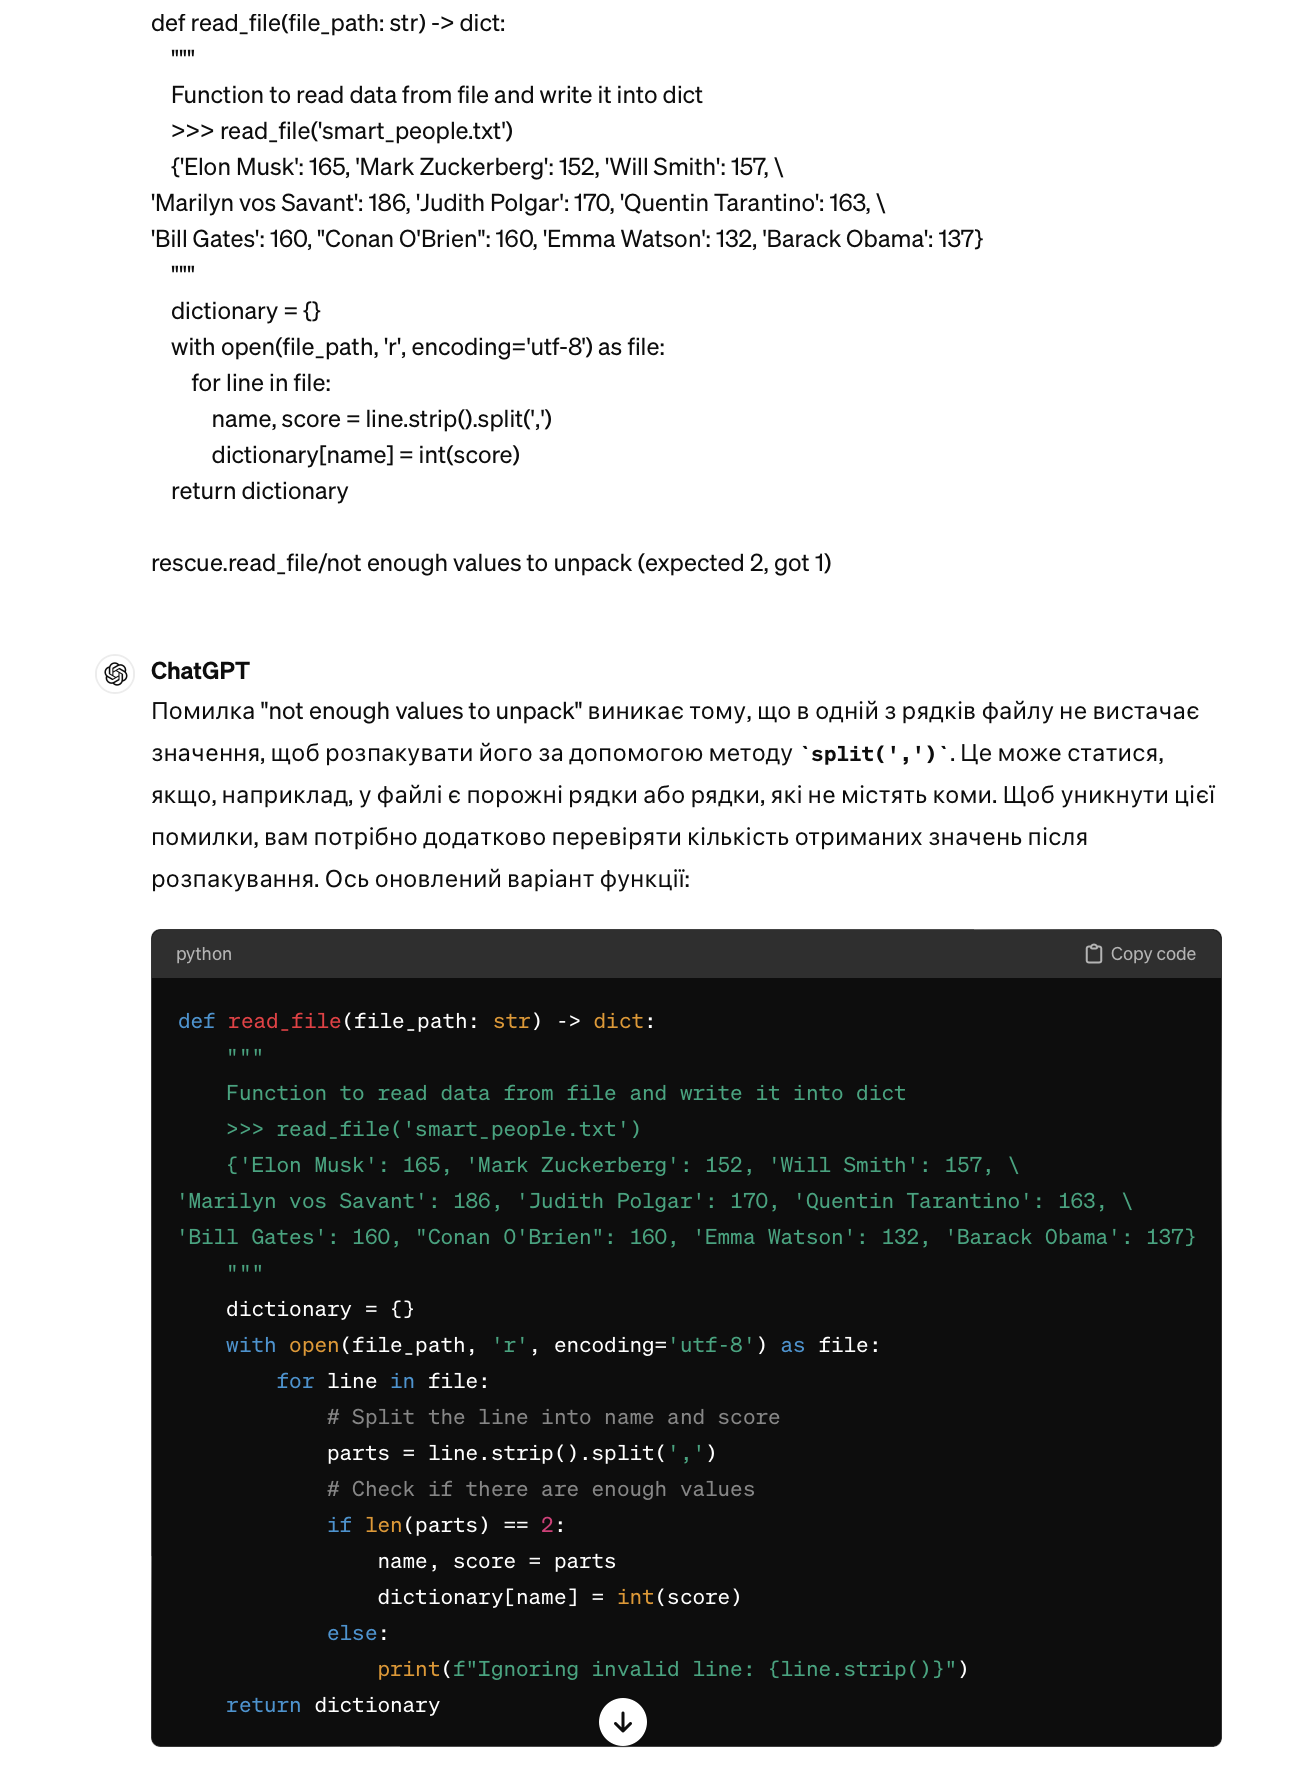

In [ ]:
def read_file(file_path: str) -> dict:
    """
    Function to read data from file and write it into dict
    >>> read_file('smart_people.txt')
    {'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Will Smith': 157, \
'Marilyn vos Savant': 186, 'Judith Polgar': 170, 'Quentin Tarantino': 163, \
'Bill Gates': 160, "Conan O'Brien": 160, 'Emma Watson': 132, 'Barack Obama': 137}
    """
    dictionary = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split the line into name and score
            parts = line.strip().split(',')
            # Check if there are enough values
            if len(parts) == 2:
                name, score = parts
                dictionary[name] = int(score)
            else:
                print(f"Ignoring invalid line: {line.strip()}")
    return dictionary

Останній код, наведений чатом, пройшов усі тести, що були на нього

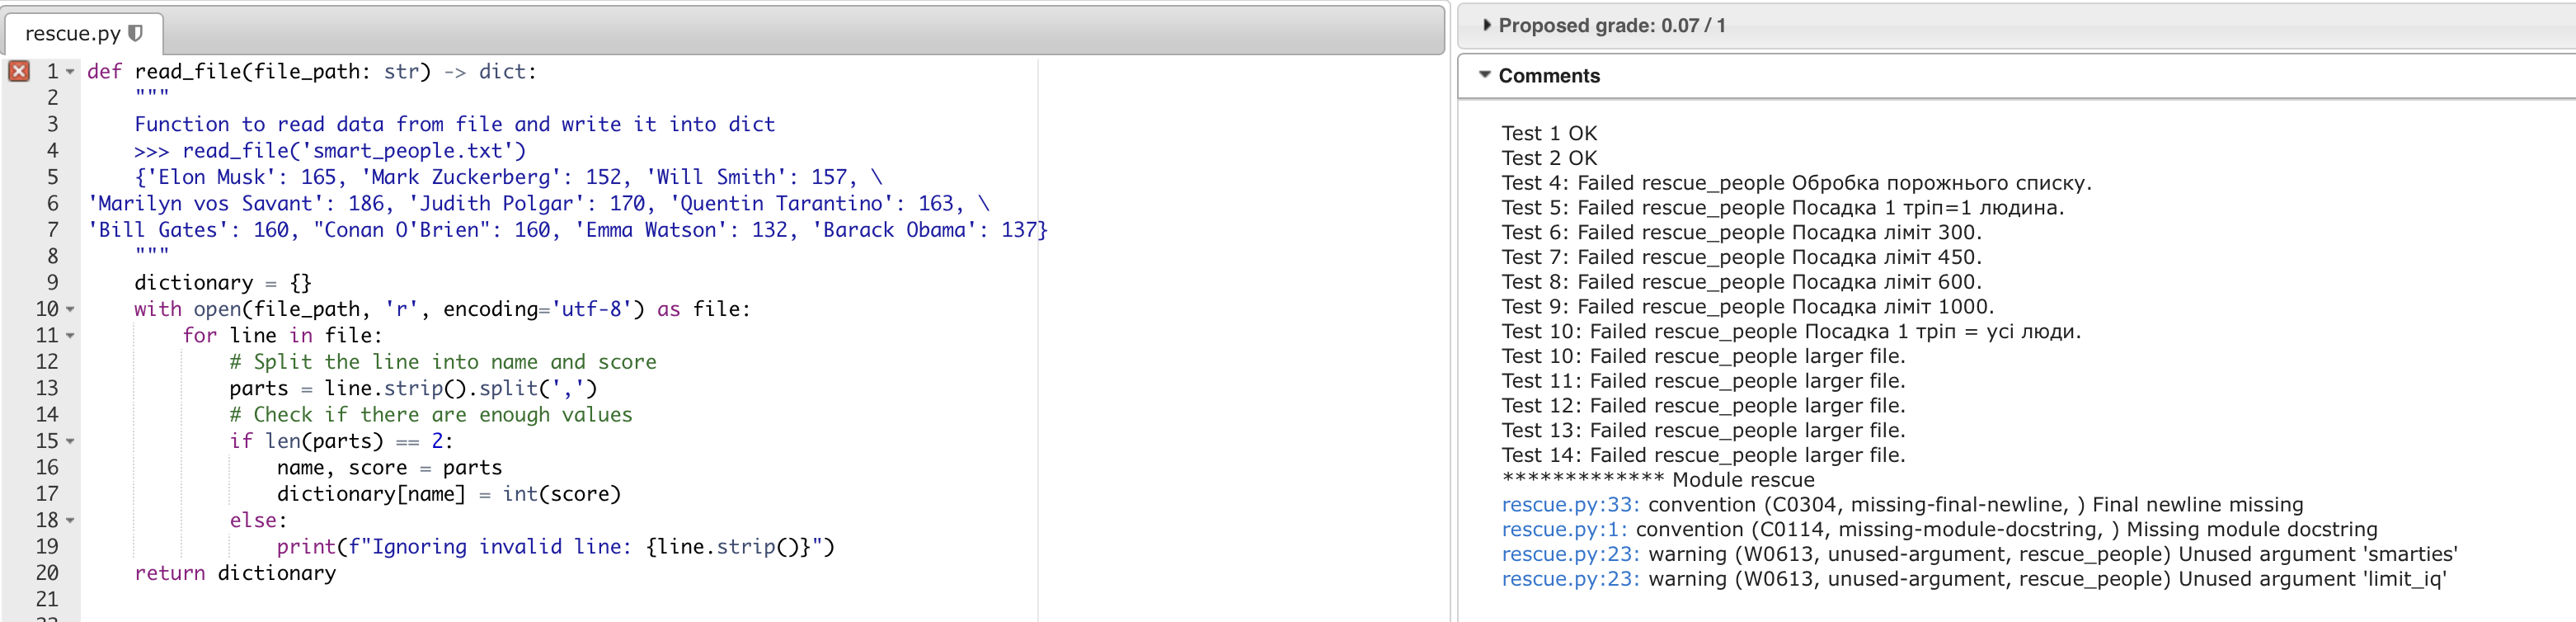

І справді покращив швидкість виконання коду:)

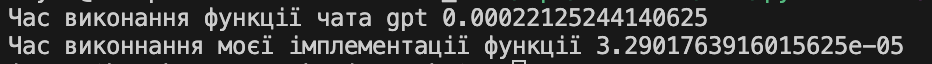

Друга функція: створення подорожей

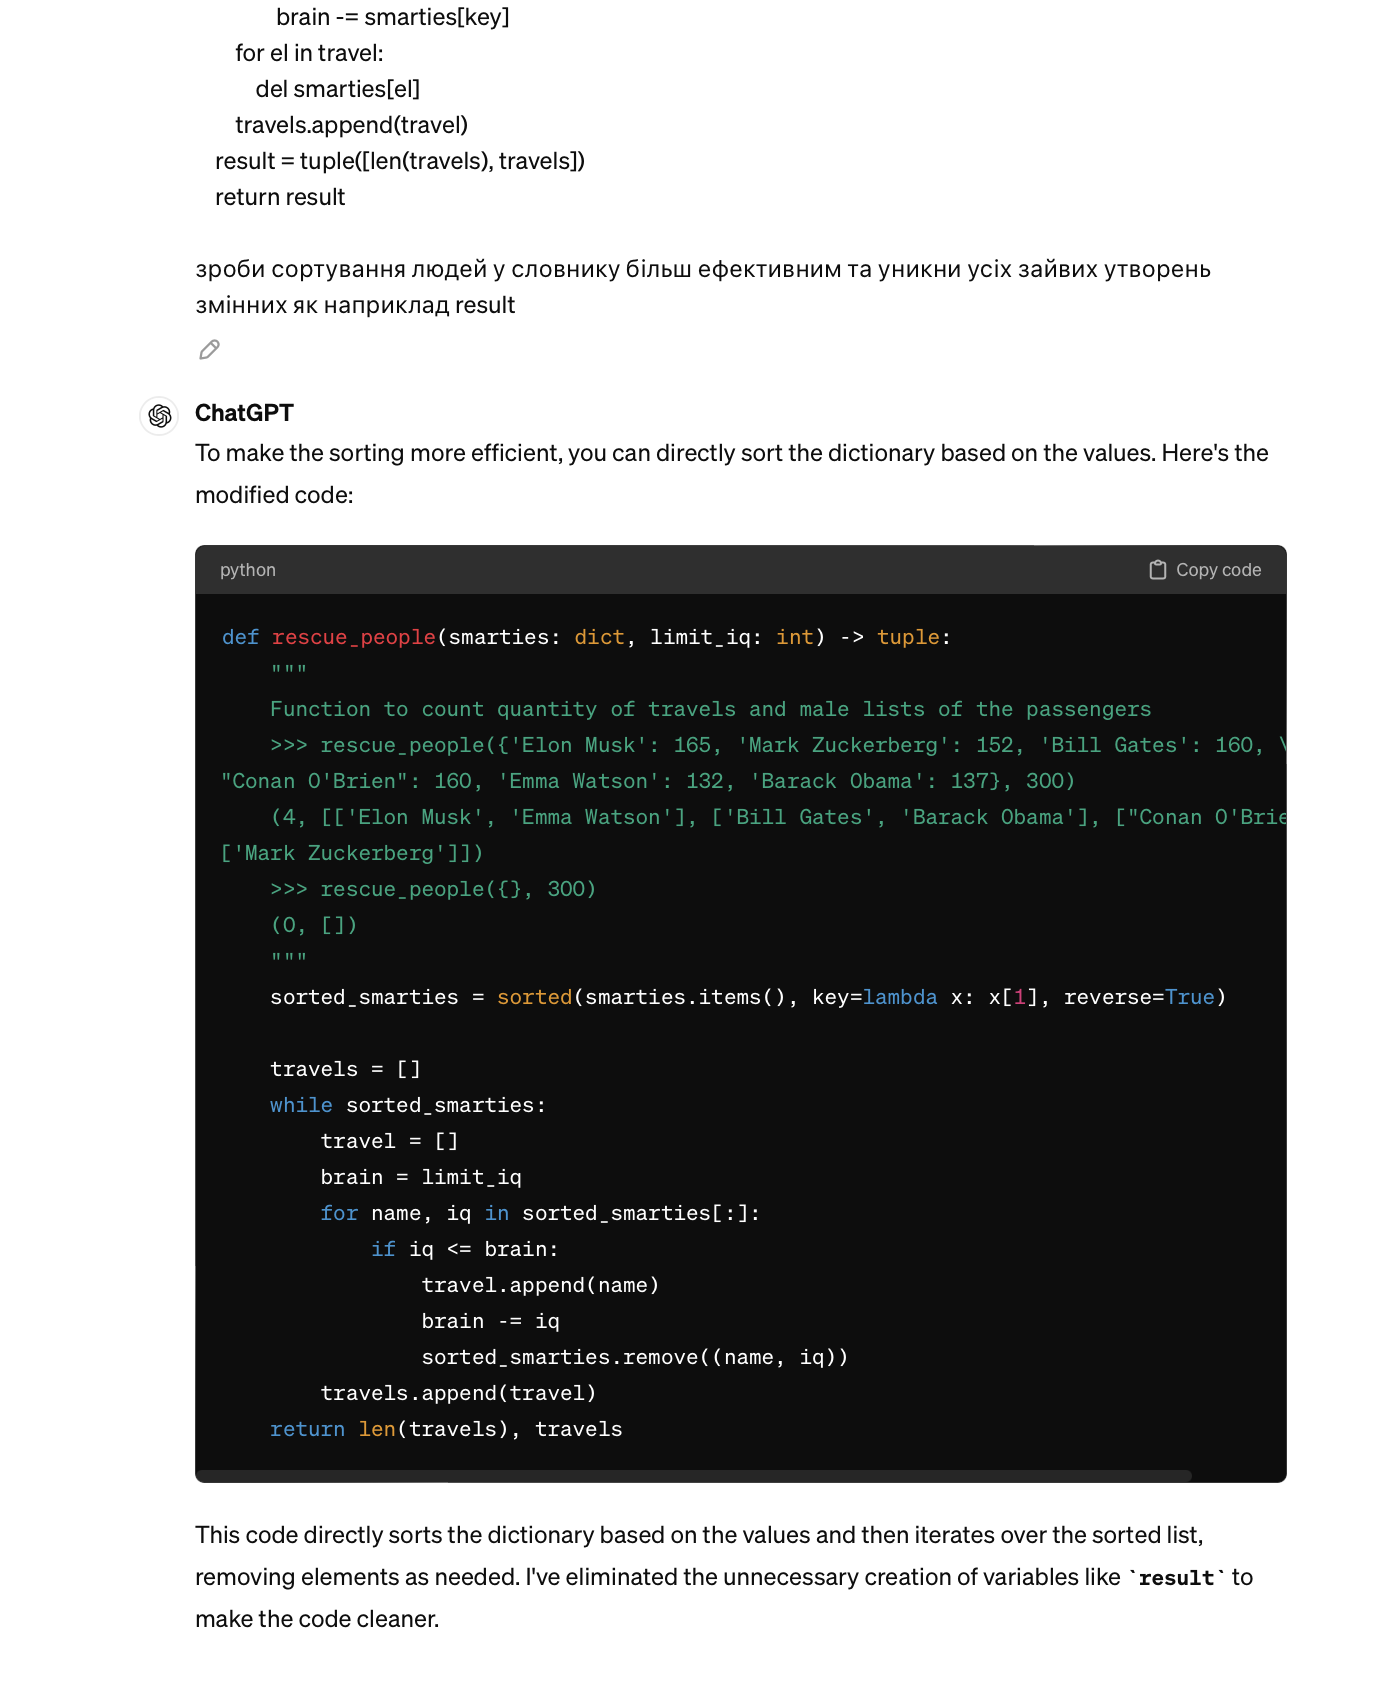

In [ ]:
def rescue_people(smarties: dict, limit_iq: int) -> tuple:
    """
    Function to count quantity of travels and male lists of the passengers
    >>> rescue_people({'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Bill Gates': 160, \
"Conan O'Brien": 160, 'Emma Watson': 132, 'Barack Obama': 137}, 300)
    (4, [['Elon Musk', 'Emma Watson'], ['Bill Gates', 'Barack Obama'], ["Conan O'Brien"], \
['Mark Zuckerberg']])
    >>> rescue_people({}, 300)
    (0, [])
    """
    sorted_smarties = sorted(smarties.items(), key=lambda x: x[1], reverse=True)

    travels = []
    while sorted_smarties:
        travel = []
        brain = limit_iq
        for name, iq in sorted_smarties[:]:
            if iq <= brain:
                travel.append(name)
                brain -= iq
                sorted_smarties.remove((name, iq))
        travels.append(travel)
    return len(travels), travels

Тести не пройшли:(

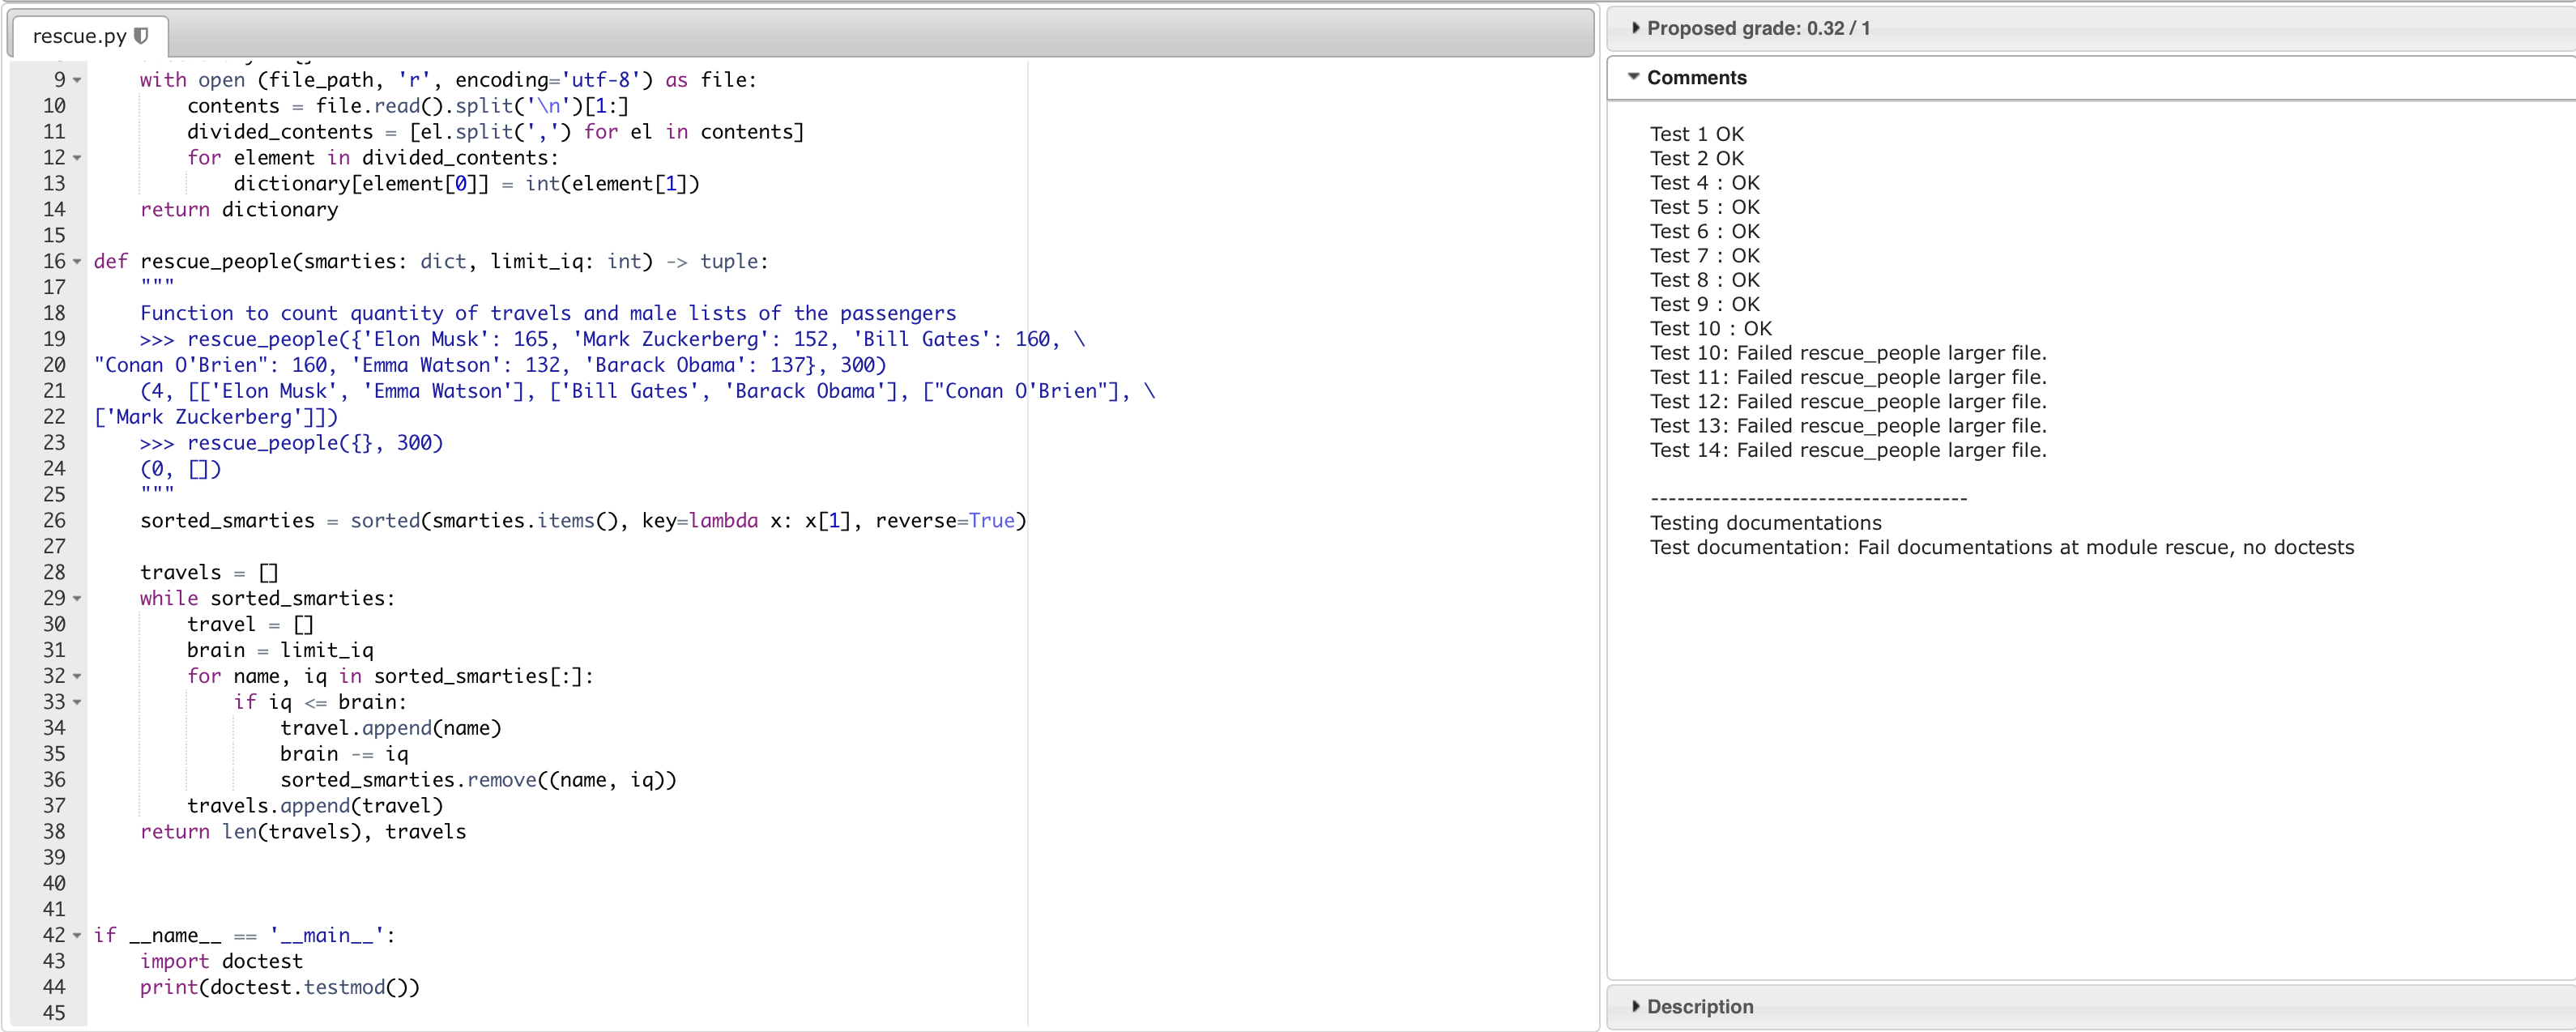

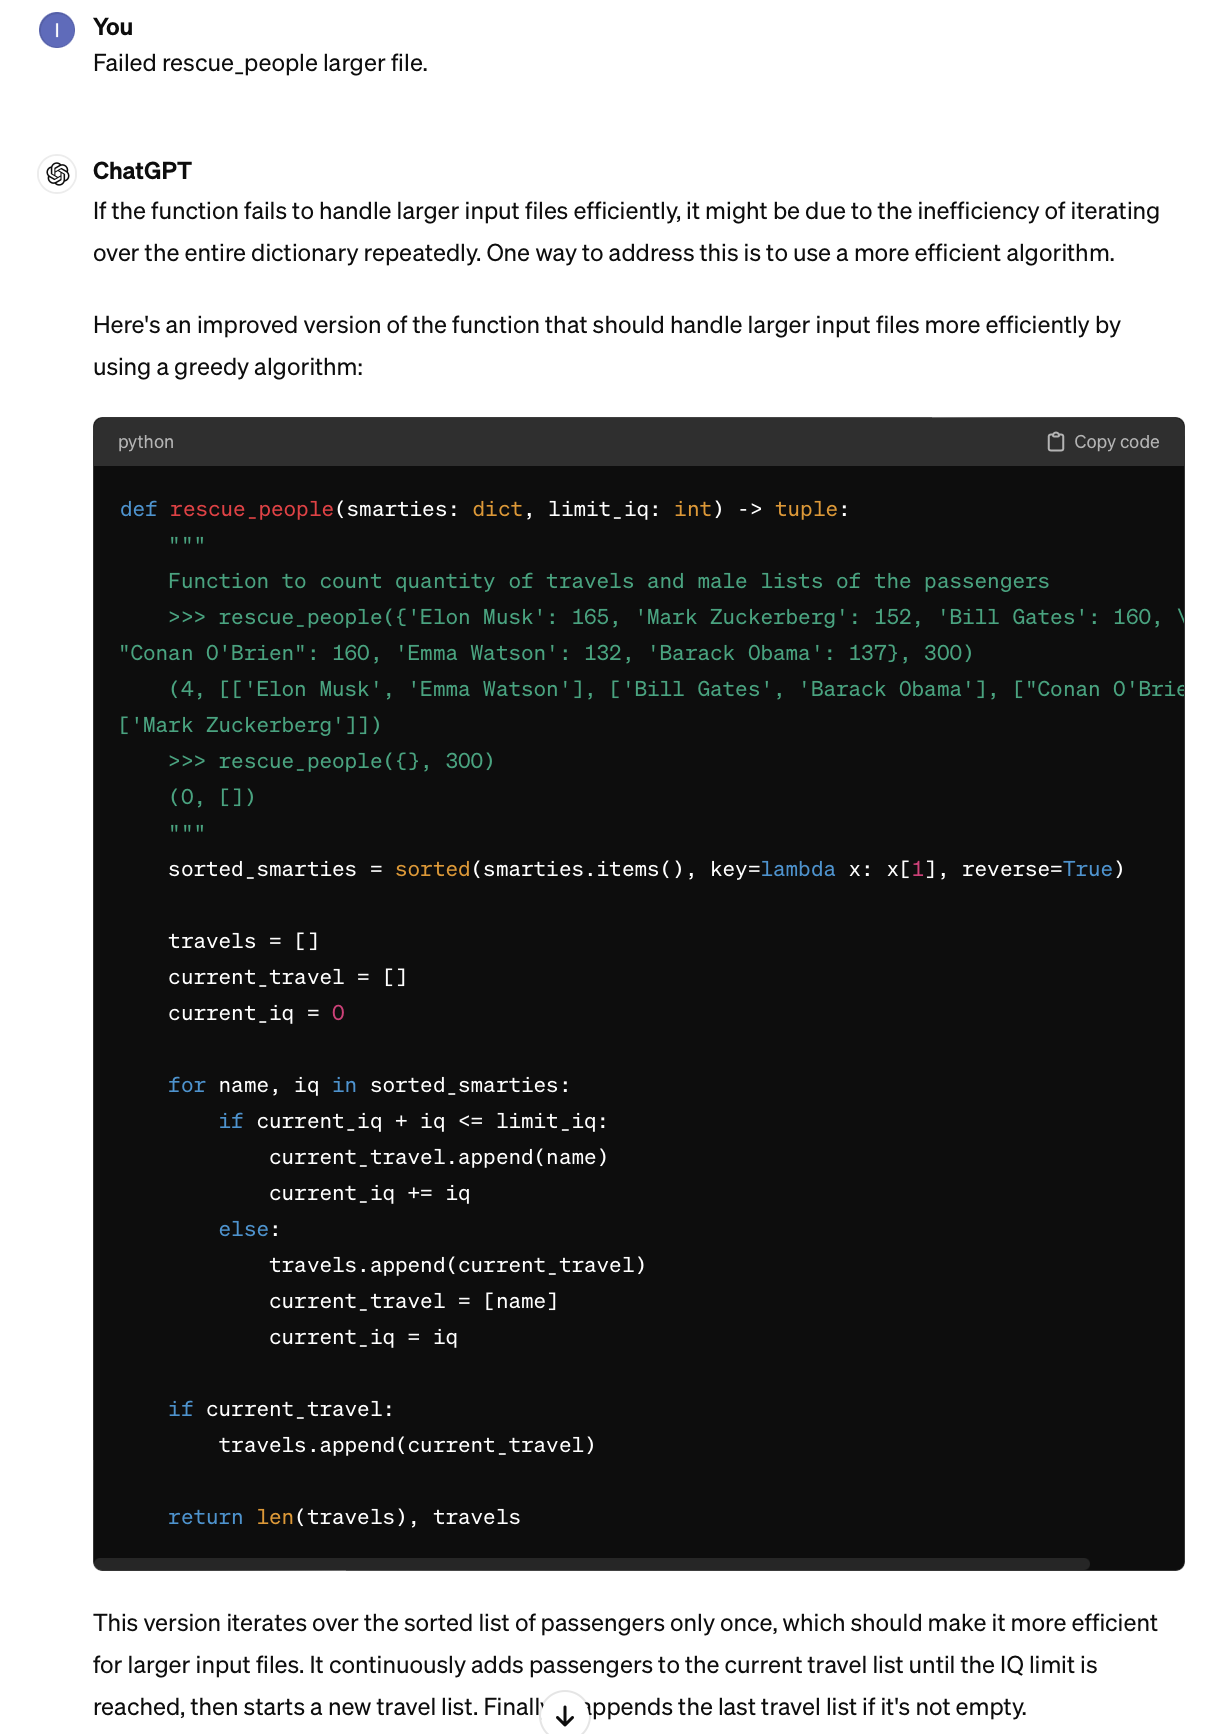

In [ ]:
def rescue_people(smarties: dict, limit_iq: int) -> tuple:
    """
    Function to count quantity of travels and male lists of the passengers
    >>> rescue_people({'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Bill Gates': 160, \
"Conan O'Brien": 160, 'Emma Watson': 132, 'Barack Obama': 137}, 300)
    (4, [['Elon Musk', 'Emma Watson'], ['Bill Gates', 'Barack Obama'], ["Conan O'Brien"], \
['Mark Zuckerberg']])
    >>> rescue_people({}, 300)
    (0, [])
    """
    sorted_smarties = sorted(smarties.items(), key=lambda x: x[1], reverse=True)

    travels = []
    current_travel = []
    current_iq = 0

    for name, iq in sorted_smarties:
        if current_iq + iq <= limit_iq:
            current_travel.append(name)
            current_iq += iq
        else:
            travels.append(current_travel)
            current_travel = [name]
            current_iq = iq

    if current_travel:
        travels.append(current_travel)

    return len(travels), travels

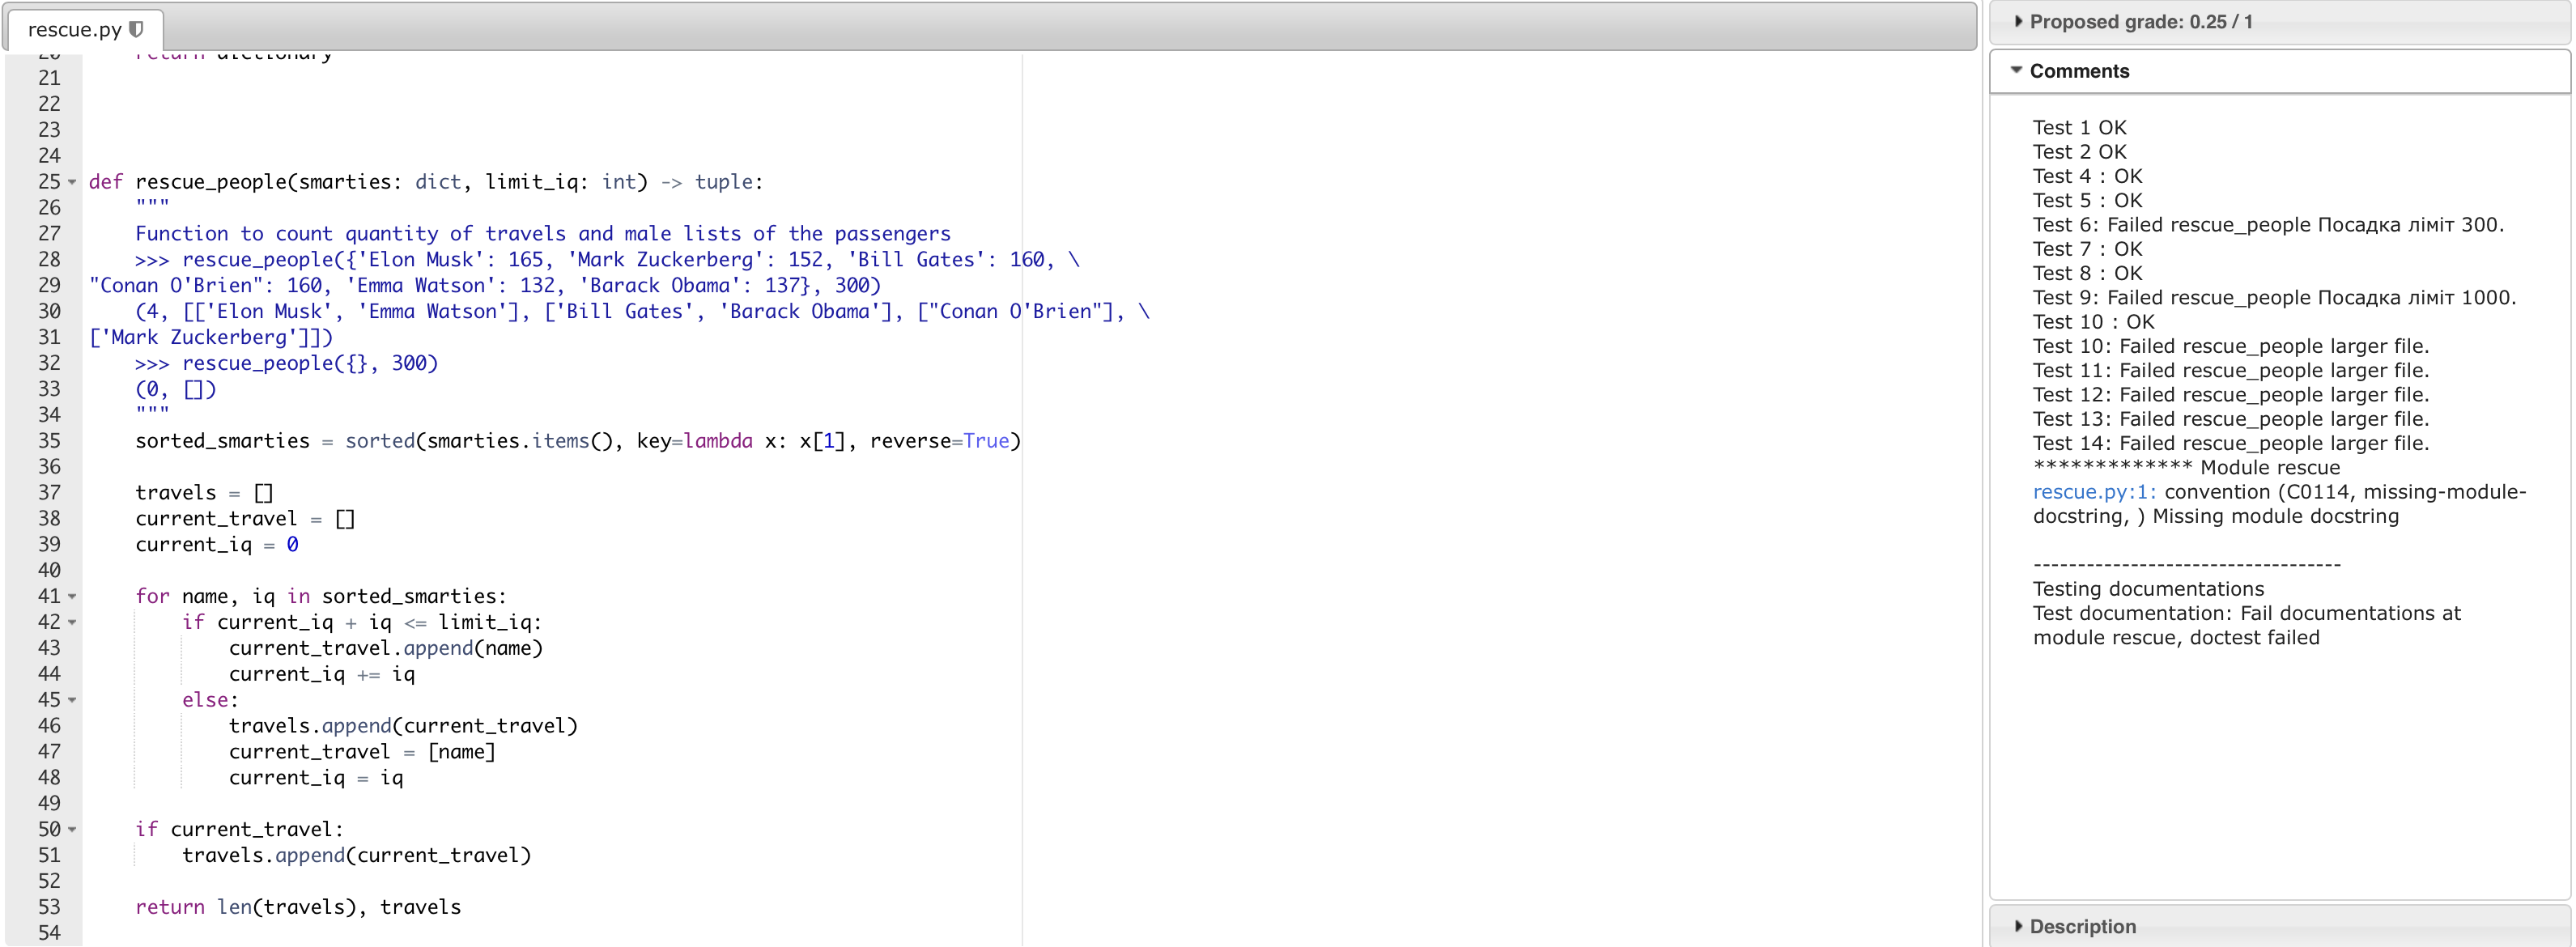

Після цього він продовжував надсилати один і той самий код. І все проходило на 0.25

Я ще раз надіслала йому коду і уточнила, що саме варто покращити

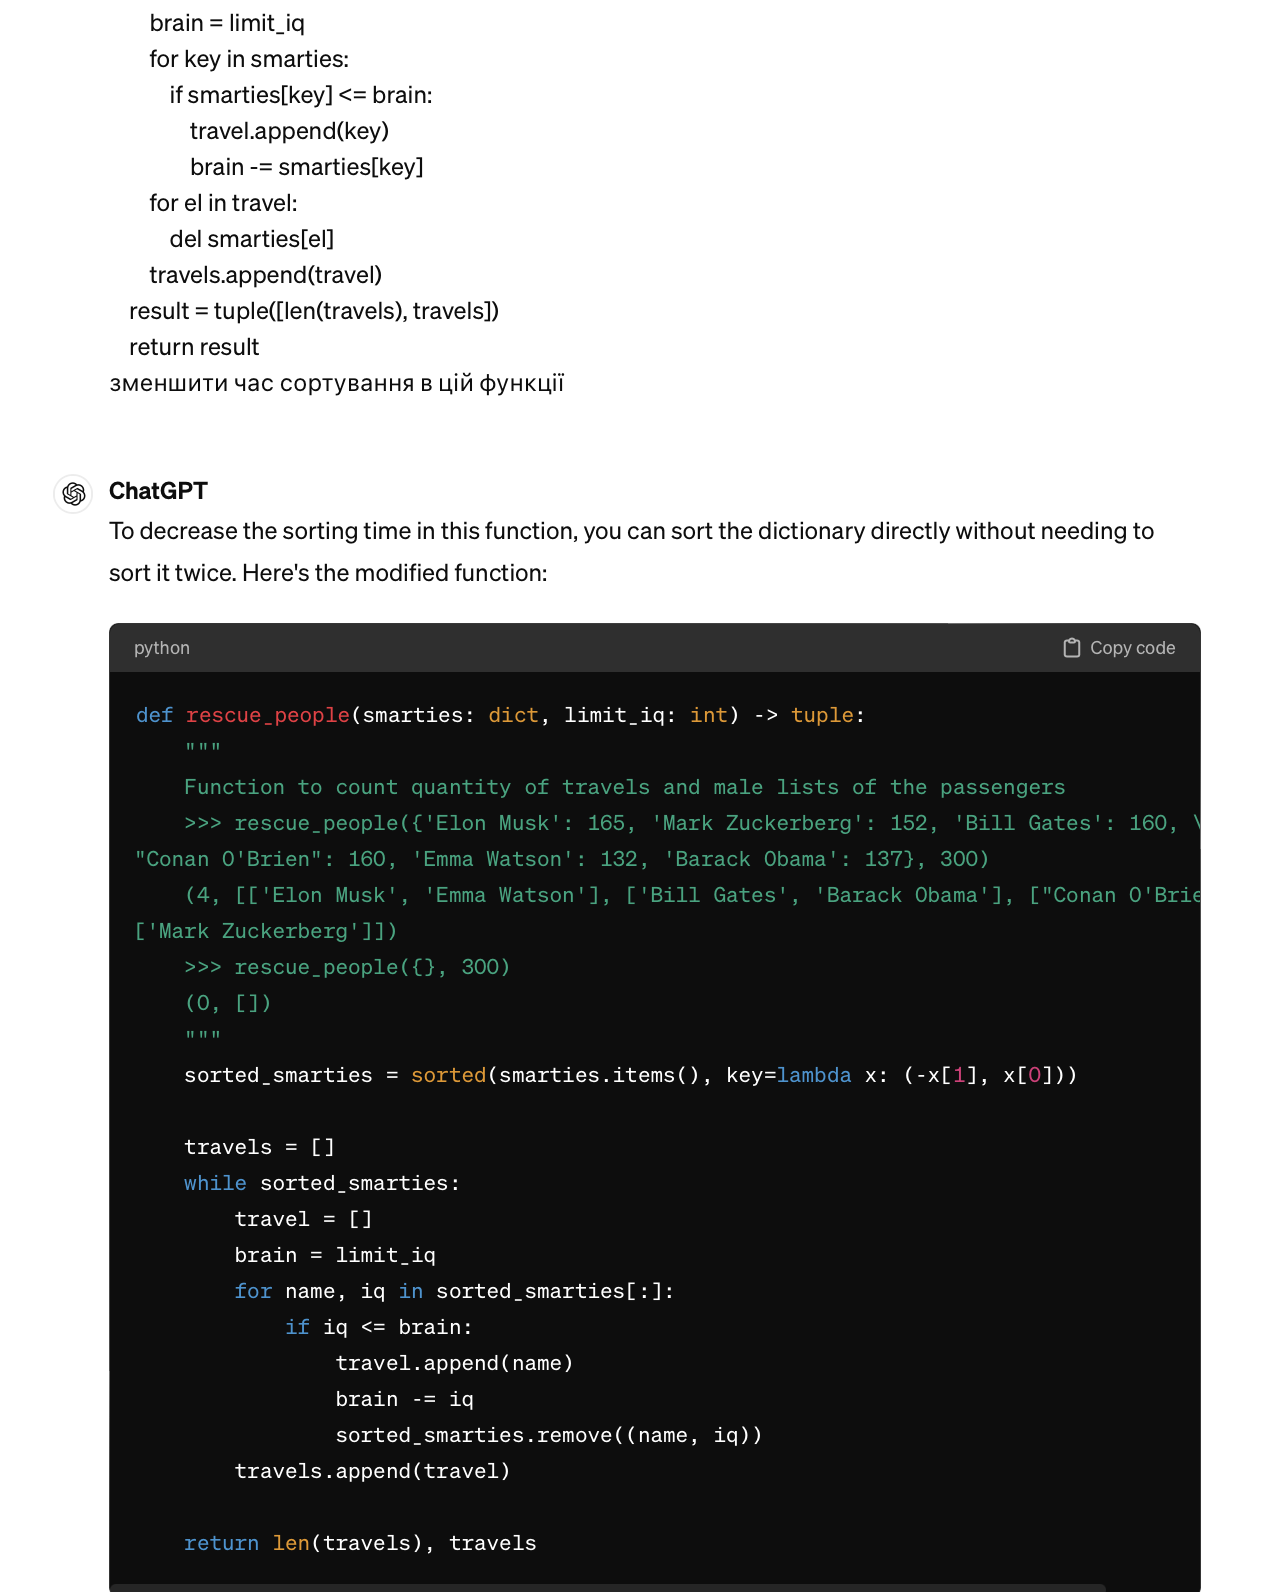

In [ ]:
def rescue_people(smarties: dict, limit_iq: int) -> tuple:
    """
    Function to count quantity of travels and male lists of the passengers
    >>> rescue_people({'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Bill Gates': 160, \
"Conan O'Brien": 160, 'Emma Watson': 132, 'Barack Obama': 137}, 300)
    (4, [['Elon Musk', 'Emma Watson'], ['Bill Gates', 'Barack Obama'], ["Conan O'Brien"], \
['Mark Zuckerberg']])
    >>> rescue_people({}, 300)
    (0, [])
    """
    sorted_smarties = sorted(smarties.items(), key=lambda x: (-x[1], x[0]))

    travels = []
    while sorted_smarties:
        travel = []
        brain = limit_iq
        for name, iq in sorted_smarties[:]:
            if iq <= brain:
                travel.append(name)
                brain -= iq
                sorted_smarties.remove((name, iq))
        travels.append(travel)

    return len(travels), travels


І з детальним поясненням, він справився

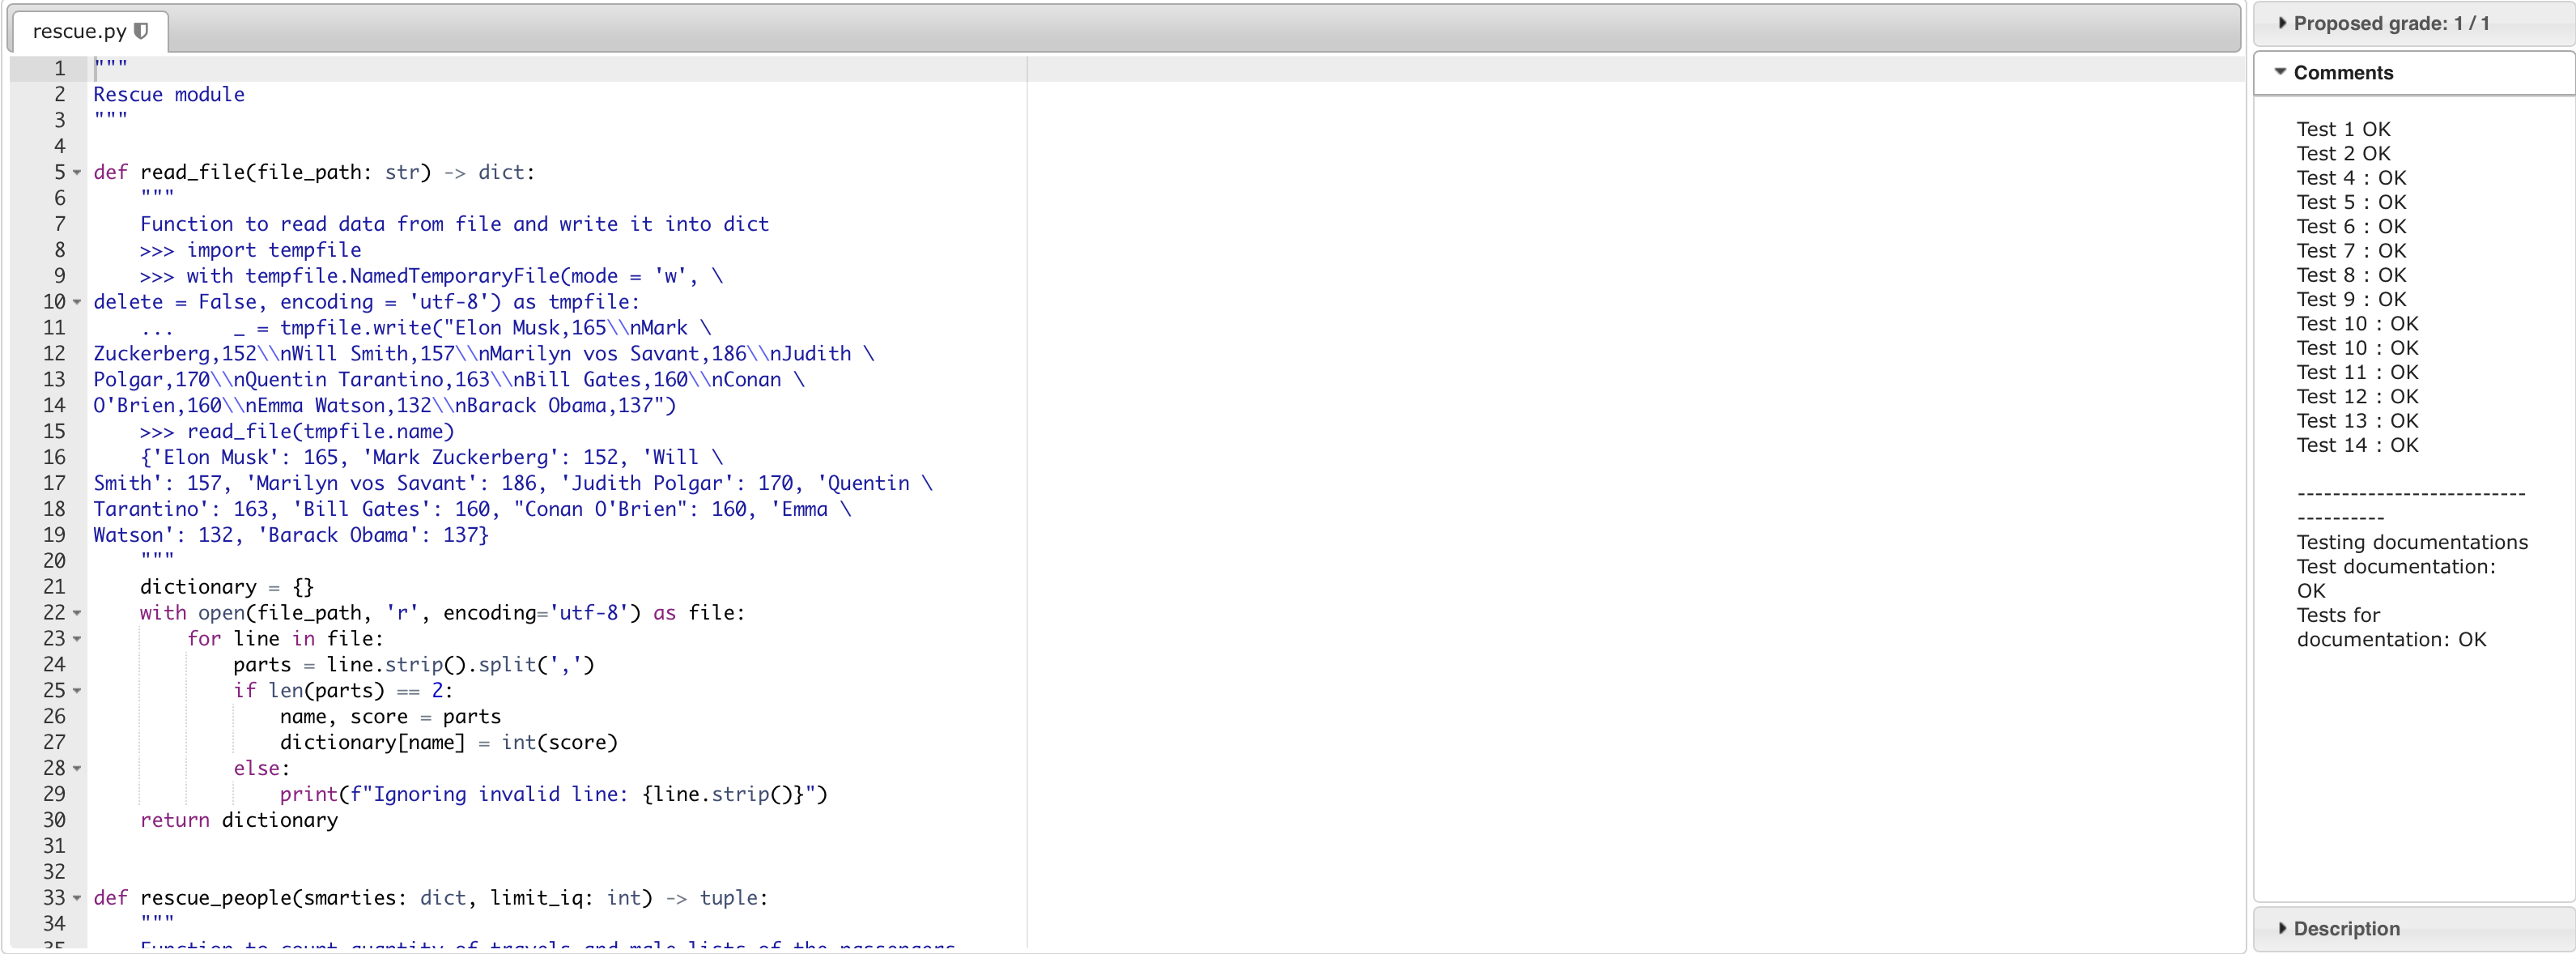

In [ ]:
"""
Rescue module
"""

def read_file(file_path: str) -> dict:
    """
    Function to read data from file and write it into dict
    >>> import tempfile
    >>> with tempfile.NamedTemporaryFile(mode = 'w', \
delete = False, encoding = 'utf-8') as tmpfile:
    ...     _ = tmpfile.write("Elon Musk,165\\nMark \
Zuckerberg,152\\nWill Smith,157\\nMarilyn vos Savant,186\\nJudith \
Polgar,170\\nQuentin Tarantino,163\\nBill Gates,160\\nConan \
O'Brien,160\\nEmma Watson,132\\nBarack Obama,137")
    >>> read_file(tmpfile.name)
    {'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Will \
Smith': 157, 'Marilyn vos Savant': 186, 'Judith Polgar': 170, 'Quentin \
Tarantino': 163, 'Bill Gates': 160, "Conan O'Brien": 160, 'Emma \
Watson': 132, 'Barack Obama': 137}
    """
    dictionary = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) == 2:
                name, score = parts
                dictionary[name] = int(score)
            else:
                print(f"Ignoring invalid line: {line.strip()}")
    return dictionary


def rescue_people(smarties: dict, limit_iq: int) -> tuple:
    """
    Function to count quantity of travels and male lists of the passengers
    >>> rescue_people({'Elon Musk': 165, 'Mark Zuckerberg': 152, 'Bill Gates': 160, \
"Conan O'Brien": 160, 'Emma Watson': 132, 'Barack Obama': 137}, 300)
    (4, [['Elon Musk', 'Emma Watson'], ['Bill Gates', 'Barack Obama'], ["Conan O'Brien"], \
['Mark Zuckerberg']])
    >>> rescue_people({}, 300)
    (0, [])
    """
    sorted_smarties = sorted(smarties.items(), key=lambda x: (-x[1], x[0]))

    travels = []
    while sorted_smarties:
        travel = []
        brain = limit_iq
        for name, iq in sorted_smarties[:]:
            if iq <= brain:
                travel.append(name)
                brain -= iq
                sorted_smarties.remove((name, iq))
        travels.append(travel)

    return len(travels), travels



if __name__ == '__main__':
    import doctest
    print(doctest.testmod())


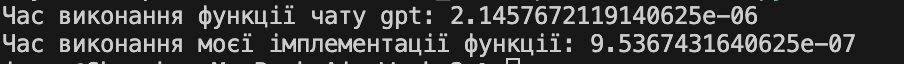